In [1]:
import json
import numpy as np
import librosa.display
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def l2_distance(a, b, show_output=False):
    a, b = np.array(a), np.array(b)
    distance = np.linalg.norm(a - b)
    
    if show_output:
        print('L2 Distance: ', distance)
    return distance

In [28]:
data_loc = 'data/new_logs/log_original_without_fc/blank_data.json'

data_loc_edited = 'data/old_logs/log_222_300epochs/blank_data.json'

In [30]:

with open(data_loc, "r+") as fhandle:
    data = json.load(fhandle)
with open(data_loc_edited, "r+") as fhandle:
    data_edited = json.load(fhandle)
    
arr = np.array(data[1])
arr_edited = np.array(data_edited[1])

arr = arr.reshape((-1, 28))
arr_edited = arr_edited.reshape((-1, 28))


l2_data = []
for frame_id in range(arr.shape[0] - 1):
    pose1 = arr[frame_id]
    pose2 = arr[frame_id + 1]
    dist = l2_distance(pose1, pose2, show_output=False)
    l2_data.append((frame_id, dist))
    
l2s = np.array(l2_data)
l2s.shape

l2_data_edited = []
for frame_id in range(arr_edited.shape[0] - 1):
    pose1 = arr_edited[frame_id]
    pose2 = arr_edited[frame_id + 1]
    dist = l2_distance(pose1, pose2, show_output=False)
    l2_data_edited.append((frame_id, dist))
    
l2s_edited = np.array(l2_data_edited)
l2s_edited.shape


(1444, 2)

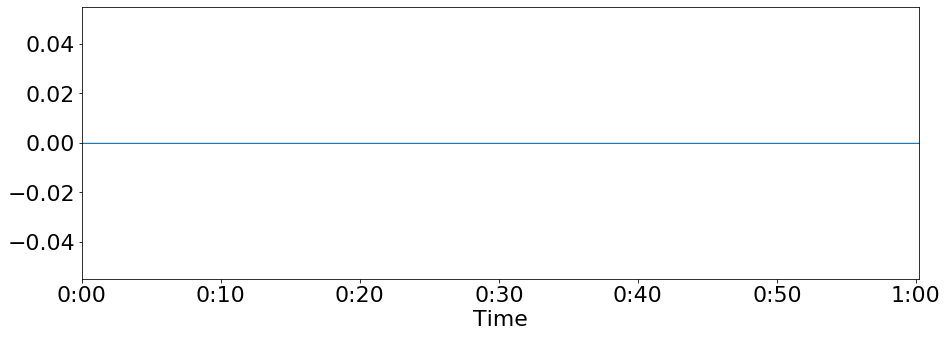

(28, 1447)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [32]:
audio_file_path = 'data/audio/blank.wav'

x, fs = librosa.load(audio_file_path)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=fs)
plt.show()
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=28, n_fft=1000, hop_length=918)
print(mfccs.shape)

x



In [14]:
x[np.where(x < 0)] = 0

In [49]:
audio_feats = []
for i in range(1444):
    audiofeat = np.max(x[i * 918 : (i+1) * 918])
    if audiofeat<0.025:
        audiofeat= audiofeat
    else:
        audiofeat= audiofeat
    audio_feats.append(audiofeat)
    #print(i * 918, (i+1) * 918)
    
audio_feats = np.array(audio_feats)

#audio_feats[np.where(audio_feats < 0)] = 0

audio_feats.shape

(1444,)

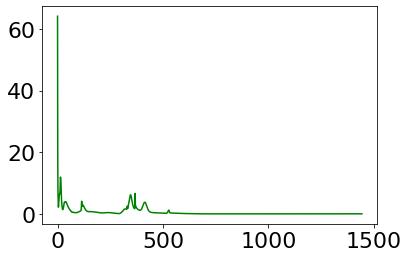

In [50]:
#fig, ax = plt.subplots(3, 1)
#fig = plt.figure(figsize=(20,10))

#ax[0].plot(l2s[:, 0], l2s[:, 1], color='g', label='Audio to Body Dynamics')
#ax[0].axis([500, 1200, 0, 100])
#ax[1].plot(l2s_edited[:, 0], l2s_edited[:, 1], color='orange', label='Ours')
#ax[1].axis([500, 1200, 0, 100])

#a= librosa.display.waveplot(audio_feats*50, sr=1, x_axis=None)
a = plt.plot(l2s[:, 0], l2s[:, 1], color='g', label='Audio to Body Dynamics')
plt.show()

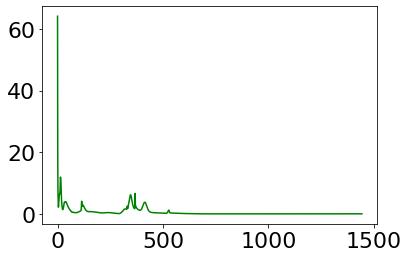

In [51]:

b = plt.plot(l2s[:, 0], l2s[:, 1], color='g', label='Audio to Body Dynamics')

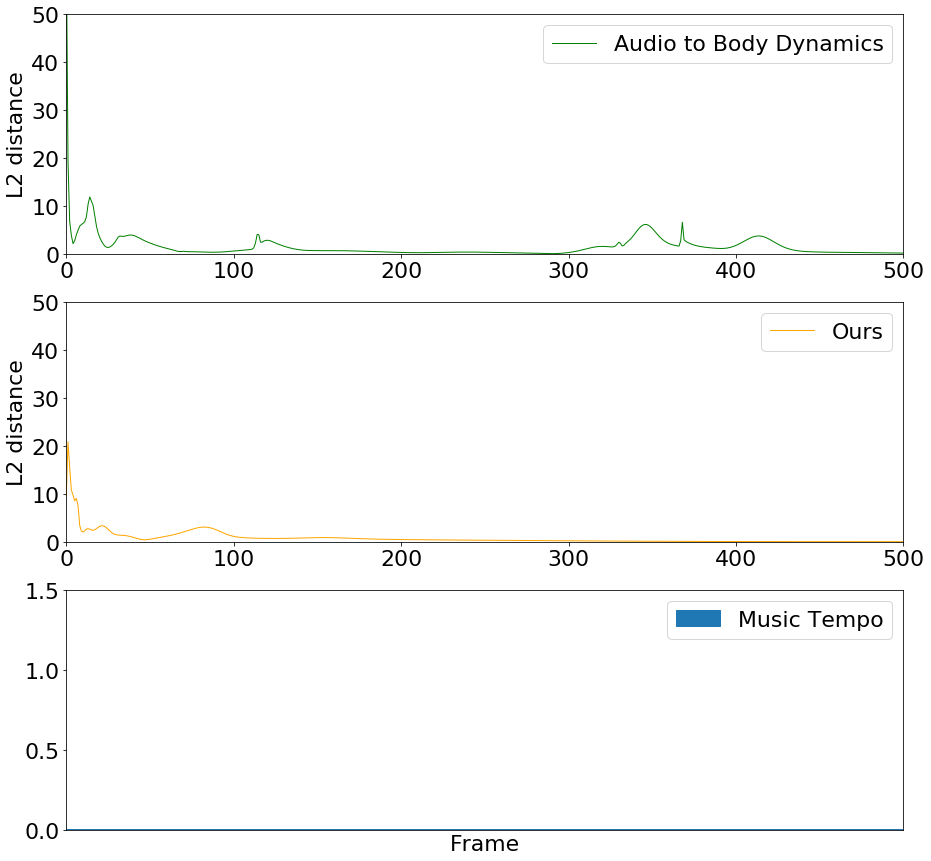

In [52]:
txts = ['(a)', '(b)', '(c)', '(d)', '(e)']

font = {'size'   : 22
       }	
plt.rc('font', **font)


fig=plt.figure(figsize=(15, 15))
images = [a, b]
#for i, img in enumerate(images):
ax = fig.add_subplot(3, 1, 1)
plt.ylabel('L2 distance')
plt.plot(l2s[:, 0], l2s[:, 1], color='g', label='Audio to Body Dynamics', linewidth=1)
plt.axis([0, 500, 0, 50])

plt.legend(loc='upper right')

ax = fig.add_subplot(3, 1, 2)
plt.ylabel('L2 distance')
plt.plot(l2s_edited[:, 0], l2s_edited[:, 1], color='orange', label='Ours', linewidth=1)
plt.axis([0, 500, 0, 50])
plt.legend()

ax = fig.add_subplot(3, 1, 3)
plt.xlabel('Frame')
librosa.display.waveplot(audio_feats, sr=1,label='Music Tempo', x_axis=None)
#plt.plot(l2s[:, 0], l2s[:, 1], color='g', label='Audio to Body Dynamics')
#ax.text(-0.03, 0.5, txts[i], size=60, ha="center", va='center', transform=ax.transAxes)
#plt.axis('off')
#fig.tight_layout()


#plt.imshow(img)
plt.autoscale()
plt.axis([0, 500, 0, 1.5])
plt.legend()
plt.show()

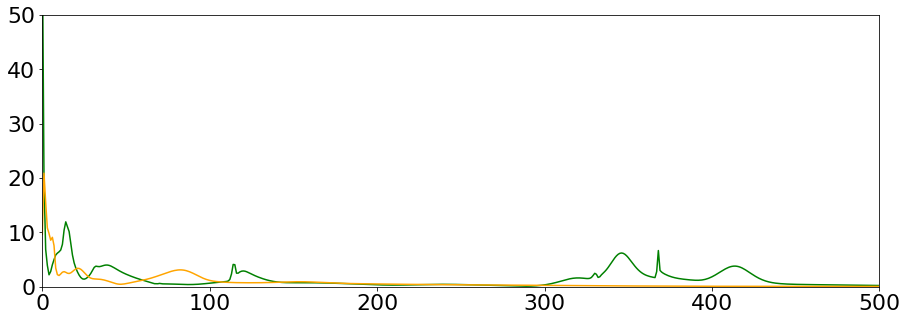

In [53]:
plt.figure(figsize=(15,5))
plt.plot(l2s[:, 0], l2s[:, 1], color='g')
plt.plot(l2s_edited[:, 0], l2s_edited[:, 1], color='orange')
#plt.plot(l2s_edited[:, 0], audio_feats, color='r')
plt.axis([0, 500, 0, 50])
plt.plot()
plt.show()

In [48]:
l2s.shape

(1444, 2)

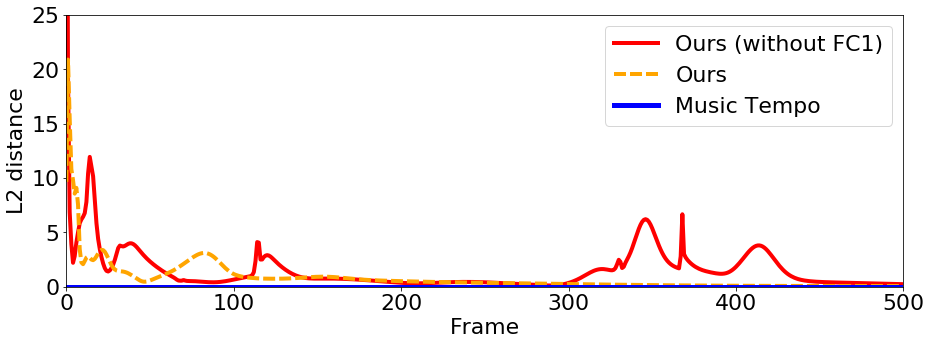

In [57]:
font = {'size'   : 22}	
plt.rc('font', **font)

plt.figure(figsize=(15,5))
plt.plot(l2s[:, 0], l2s[:, 1], color='r', label='Ours (without FC1)', linewidth=4)

dashes = [3,1,3,1] # 5 points on, 2 off, 3 on, 1 off

l, = plt.plot(l2s_edited[:, 0], l2s_edited[:, 1], color='orange', label='Ours', linewidth=4)

l.set_dashes(dashes)

plt.plot(l2s_edited[:, 0], audio_feats, color='b', label="Music Tempo", linewidth=5)
plt.axis([0, 500, 0, 25])
plt.legend()
plt.ylabel('L2 distance')
plt.xlabel('Frame')
plt.plot()
plt.show()